# Parallel Computing Using Dask


Python is one of the most popular programming languages among data professionals. Python data science libraries such as Numpy, Pandas, Scipy, and Scikit-learn can sequentially perform data science tasks. However, with large datasets, these libraries will become very slow due to not being scalable beyond a single machine. This is where Dask comes into the picture. Dask helps data professionals handle datasets that are larger than the RAM size on a single machine. Dask utilizes the multiple cores of a processor or uses it as a distributed computed environment. Dask has the following qualities:

- It is familiar with existing Python libraries
- It offers flexible task scheduling
- It offers a single and distributed environment for parallel computation
- It performs fast operations with lower latency and overhead
- It can scale up and scale down

Dask offers similar concepts to pandas, NumPy, and Scikit-learn, which makes it easier to learn. It is an open source parallel computing Python library that runs on top of pandas, Numpy, and Scikit-learn across multiple cores of a CPU or multiple systems. For example, if a laptop has a quad-core processor, then Dask will use 4 cores for processing the data. If the data won't fit in the RAM, it will be partitioned into chunks before processing. Dask scales up the pandas and NumPy capacity to deal with moderately large datasets. Let's understand how Dask perform operations in parallel by looking at the following diagram:

![](./image/dask.png)

Dask creates a task graph to execute a program in parallel mode. In the task graph, nodes represent the task, and the edges between the nodes represent the dependency of one task over another.



Primary data types are the basic data types such as int, float, and char, while secondary data types are developed using primary data types such as lists, arrays, strings, and DataFrames. Dask offers three data structures for parallel operations: DataFrames, Bags, and Arrays. These data structures split data into multiple partitions and distribute them to multiple nodes in the cluster. A Dask DataFrame is a combination of multiple small pandas DataFrames and it operates in a similar manner. Dask Arrays are like NumPy arrays and support all the operations of Numpy. Finally, Dask Bags are used to process large Python objects.



In [1]:
# !pip install dask-ml
# !pip install dask
# !pip install "dask-ml[xgboost]" 
# !pip install "dask-ml[tensorflow]"
# !pip install "dask-ml[complete]"


import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Dask Array

A Dask Array is an abstraction of the NumPy n-dimensional array, processed in parallel and partitioned into multiple sub-arrays. These small arrays can be on local or distributed remote machines. Dask Arrays can compute large-sized arraysby utilizing all the available cores in the system. They can be applied to statistics, optimization, bioinformatics, business domains, environmental science, and many more fields. They also support lots of NumPy operations, such as arithmetic and scalar operations, aggregation operations, matrices, and linear algebra operations. However, they do not support unknown shapes. Also, the tolist and sort operations are difficult to perform in parallel. Let's understand how Dask Arrays decompose data into a NumPy array and execute them in parallel by taking a look at the following diagram:


![](./image/Dask_array.png)

In [2]:
# import Dask Array
import dask.array as da    

# Create Dask Array using arange() function and generate values from 0 to 17
a = da.arange(18, chunks=4)

# Compute the array
a.compute() 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In the preceding example, an array with 18 values was partitioned into five parts with a chunk size of 4, where these initial chunks have 4 values each and the last one has 2 values.



In [3]:
# Check the chunk size
a.chunks

((4, 4, 4, 4, 2),)

## Dask DataFrames

Dask DataFrames are abstractions of pandas DataFrames. They are processed in parallel and partitioned into multiple smaller pandas DataFrames, as shown in the following diagram:

![](./image/Dask_DF.png)

These small DataFrames can be stored on local or distributed remote machines. Dask DataFrames can compute large-sized DataFrames by utilizing all the available cores in the system. They coordinate the DataFrames using indexing and support standard pandas operations such as groupby, join, and time series. Dask DataFrames perform operations such as element-wise, row-wise, isin(), and date faster compared to set_index() and join() on index operations. Now, let's experiment with the performance or execution speed of Dask:



In [4]:
# Read csv file using  pandas
import pandas as pd
%time temp = pd.read_csv("./data/HR_comma_sep.csv") 
# Read csv file using Dask
import dask.dataframe as dd
%time df = dd.read_csv("./data/HR_comma_sep.csv")

CPU times: user 4.97 ms, sys: 916 µs, total: 5.89 ms
Wall time: 5.89 ms
CPU times: user 1.93 ms, sys: 475 µs, total: 2.4 ms
Wall time: 2.41 ms


### DataFrame Indexing

Dask DataFrames support two types of index: label-based and positional indexing. The main problem with Dask Indexing is that it does not maintain the partition's information. This means it is difficult to perform row indexing; only column indexing is possible. DataFrame.iloc only supports integer-based indexing, while DataFrame.loc supports label-based indexing. DataFrame.iloc only selects columns.



In [5]:
# Import Dask and Pandas DataFrame
import dask.dataframe as dd
import pandas as pd

# Create Pandas DataFrame
df = pd.DataFrame({"P": [10, 20, 30], "Q": [40, 50, 60]},
                  index=['p', 'q', 'r'])
df.head()


# In the preceding example, we created a pandas DataFrame 
# (with p, q, and r indexes and P and Q columns) and 
# converted it into a Dask DataFrame.

# Create Dask DataFrame
ddf = dd.from_pandas(df, npartitions=2)

# Check top records
ddf.head()

,P,Q
p,10,40
q,20,50
r,30,60


,P,Q
p,10,40
q,20,50
r,30,60


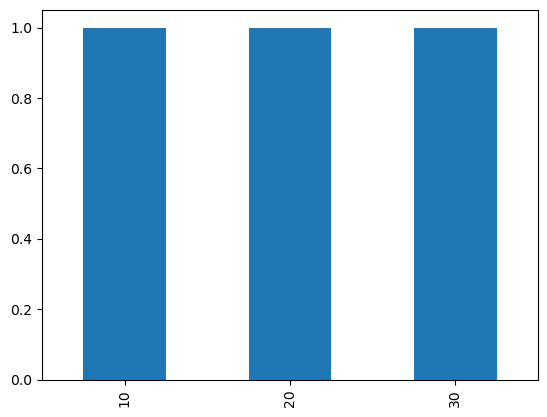

In [6]:
df.P.value_counts().plot(kind='bar');

In [7]:
# Single Column Selection
ddf['P']

# Multiple Column Selection
ddf[['Q', 'P']]

Dask Series Structure:
npartitions=1
p    int64
r      ...
Name: P, dtype: int64
Dask Name: getitem, 2 tasks

,Q,P
npartitions=1,,
p,int64,int64
r,...,...


In [8]:
# Import Dask and Pandas DataFrame
import dask.dataframe as dd
import pandas as pd

# Create Pandas DataFrame
df = pd.DataFrame({"X": [11, 12, 13], "Y": [41, 51, 61]})

# Create Dask DataFrame
ddf = dd.from_pandas(df, npartitions=2)

# Check top records
ddf.head()

,X,Y
0,11,41
1,12,51
2,13,61


In [9]:
ddf.iloc[:, [1, 0]].compute()

,Y,X
0,41,11
1,51,12
2,61,13


In [10]:
# ddf.iloc[0:4, [1, 0]].compute() # Make an error

### Filter data



In [11]:
# Import Dask DataFrame
import dask.dataframe as dd

# Read CSV file
ddf = dd.read_csv('./data/HR_comma_sep.csv')

# See top 5 records
ddf.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


low       7316
medium    6446
high      1237
Name: salary, dtype: int64

<AxesSubplot:>

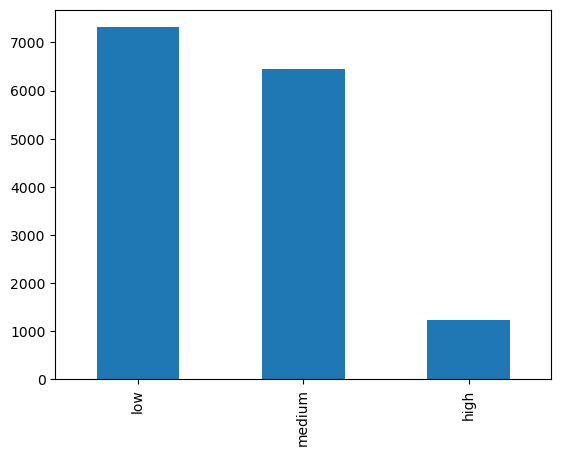

In [12]:
ddf.salary.value_counts().compute()

ddf.salary.value_counts().compute().plot(kind='bar')

In [13]:
# Filter employee with low salary
ddf2 = ddf[ddf.salary == 'low']
ddf2.compute().head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low


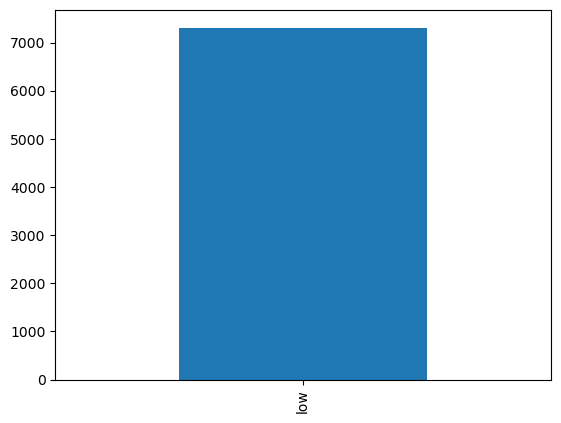

In [14]:
ddf2.salary.value_counts().compute().plot(kind='bar');

## Groupby

The groupby operation is used to aggregate similar items. First, it splits the data based on the values, finds an aggregate of similar values, and combines the aggregated results. This can be seen in the following code:

In [15]:
# Find average values of all the columns for employee left or stayed 
ddf.groupby('left').mean().compute()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


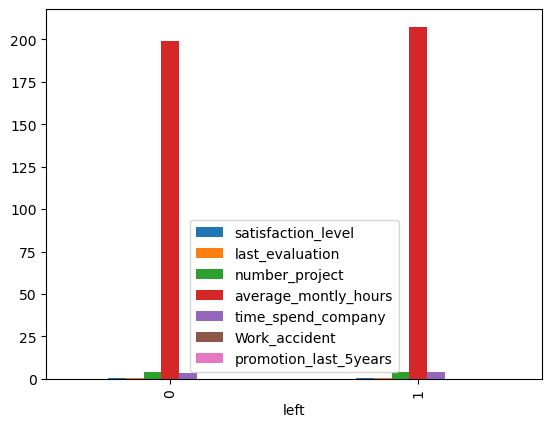

In [16]:
ddf.groupby('left').mean().compute().plot(kind='bar');

## Converting a pandas DataFrame into a Dask DataFrame

Dask DataFrames are implemented based on pandas DataFrames. For data analysts, it is necessary to learn how to convert a Dask DataFrame into a pandas DataFrame. Take a look at the following code:

In [17]:
# Import Dask DataFrame
from dask import dataframe as dd

pd_df = pd.read_csv("./data/Advertising.csv")

# Convert pandas dataframe to dask dataframe
ddf = dd.from_pandas(pd_df,chunksize=4)

type(ddf)

dask.dataframe.core.DataFrame

## Converting a Dask DataFrame into a pandas DataFrame

In the previous subsection, we converted a pandas DataFrame into a Dask DataFrame. Similarly, we can convert a Dask DataFrame into a pandas DataFrame using the compute() method, as shown here:

In [18]:
# Convert dask DataFrame to pandas DataFrame
pd_df = ddf.compute()

type(pd_df)

pandas.core.frame.DataFrame

## Dask Bags

A Dask Bag is an abstraction over generic Python objects. It performs map, filter, fold, and groupby operations in the parallel interface of smaller Python objects using a Python iterator. 
This execution is similar to PyToolz or the PySpark RDD.
 Dask Bags are more suitable for unstructured and semi-structured datasets such as text, JSON, and log files. 
 They perform multiprocessing for computation for faster processing but will not perform well with inter-worker communication.
  Bags are immutable types of structures that cannot be changed and are slower compared to Dask Arrays and DataFrames.
   Bags also perform slowly on the groupby operation, so it is recommended that you use foldby instead of groupby. 

### Creating Dask bag using Python Iterable items

In [19]:
# Import dask bag
import dask.bag as db

# Create a bag of list items
items_bag = db.from_sequence([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], npartitions=3)

# Take initial two items
items_bag.take(2)

(1, 2)

In [20]:
# Filter the bag of list items
items_square=items_bag.filter(lambda x: x if x % 2 != 0 else None)

# Compute the results
items_square.compute()

[1, 3, 5, 7, 9]

In [21]:
# Square the bag of list items
items_square=items_bag.map(lambda x: x**2)

# Compute the results
items_square.compute()

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

### Creating Dask Bag using text file

In [22]:
# Import dask bag
import dask.bag as db

# Create a bag of text file
text = db.read_text('./data/sample.txt')

# Show initial 1 items from text
text.take(2)

('Hi! how are you? \n', '\n')

### Storing Dask Bag into text file

In [23]:
# Convert dask bag object into text file
text.to_textfiles('./data/*.txt.gz')
text.take(1)

['/Users/parsanemati/Yandex.Disk.localized/github/data_science_eda/parallel computing /DASK/./data/0.txt.gz']

('Hi! how are you? \n',)

### Storing Dask Bag into DataFrame

In [24]:
# Import dask bag
import dask.bag as db

# Create a bag of dictionary items
dict_bag = db.from_sequence([{'item_name': 'Egg', 'price': 5},
                      {'item_name': 'Bread', 'price': 20},
                      {'item_name': 'Milk', 'price': 54}],
                      npartitions=2)

# Convert bag object into dataframe
df = dict_bag.to_dataframe()

# Execute the graph results
df.compute()


,item_name,price
0,Egg,5
1,Bread,20
0,Milk,54


## Dask Delayed

Dask Delayed is an approach we can use to parallelize code. It can delay the dependent function calls in task graphs and provides complete user control over parallel processes while improving performance. Its lazy computation helps us control the execution of functions. However, this differs from the execution timings of functions for parallel execution.



In [25]:
# Import dask delayed and compute
from dask import delayed, compute

# Create delayed function
@delayed
def cube(item):
    return item ** 3

# Create delayed function
@delayed
def average(items):
    return sum(items)/len(items)

# create a list
item_list = [2, 3, 4]

# Compute cube of given item list
cube_list= [cube(i) for i in item_list]

# Compute average of cube_list
computation_graph = average(cube_list)

# Compute the results
computation_graph.compute()

33.0

In the preceding example, two methods, cube and average, were annotated with @dask.delayed. A list of three numbers was created and a cube containing every value was computed. After computing the cube of list values, we calculated the average of all the values. All these operations are lazy in nature and are computed later when the output is expected from the programmer and the flow of execution is stored in a computational graph. We executed this using the compute() method. Here, all the cube operations will execute in a parallel fashion.



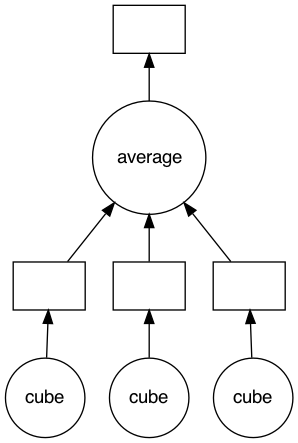

In [26]:
# Visualize the graph
computation_graph.visualize()

## Preprocessing

Dask preprocessing offers scikit-learn functionalities such as scalers, encoders, and train/test splits. These preprocessing functionalities work well with Dask DataFrames and Arrays since they can fit and transform data in parallel. In this section, we will discuss feature scaling and feature encoding.



### Feature scaling in Dask

As we discussed in Chapter 7, Cleaning Messy Data, feature scaling, also known as feature normalization, is used to scale the features at the same level. It can handle issues regarding different column ranges and units. Dask also offers scaling methods that have parallel execution capacity. It uses most of the methods that scikit-learn offers:

| Scaler| Description |
|-----------|-------------|
| MinMaxScaler|  Transforms features by scaling each feature to a given range |
| RobustScaler|  Scales features using statistics that are robust to outliers |
| StandardScaler|  Standardizes features by removing the mean and scaling them to unit variance |
 

### Feature Scaling

In [27]:
# Import Dask DataFrame
import dask.dataframe as dd

# Read CSV file
ddf = dd.read_csv('./data/HR_comma_sep.csv')

# See top 5 records
ddf.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [28]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate the MinMaxScaler Object
scaler = MinMaxScaler(feature_range=(0, 100))

# Fit the data on Scaler
scaler.fit(ddf[['last_evaluation']])

# Transform the data
performance_score=scaler.transform(ddf[['last_evaluation']])

# Let's see the scaled performance score
performance_score

MinMaxScaler(feature_range=(0, 100))

array([[26.5625],
       [78.125 ],
       [81.25  ],
       ...,
       [26.5625],
       [93.75  ],
       [25.    ]])

### Feature Encoding
Cleaning Messy Data, feature encoding is a very useful technique for handling categorical features. Dask also offers encoding methods that have parallel execution capacity. It uses most of the methods that scikit-learn offers:


| Encoder        | Description                                                                                   |
|----------------|-----------------------------------------------------------------------------------------------|
| LabelEncoder   | Encodes labels with a value between 0 and 1 that's less than the number of classes available. |
| OneHotEncoder  | Encodes categorical integer features as a one-hot encoding.                                   |
| OrdinalEncoder | Encodes a categorical column as an ordinal variable.                                          |

In [29]:
# Import Onehot Encoder
from dask_ml.preprocessing import Categorizer
from dask_ml.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

# Create pipeline with Categorizer and OneHotEncoder
pipe = make_pipeline(
    Categorizer(), OneHotEncoder())

# Fit and transform the Categorizer and OneHotEncoder
pipe.fit(ddf[['salary',]])
result=pipe.transform(ddf[['salary',]])

# See top 5 records
result.head()

Pipeline(steps=[('categorizer', Categorizer()),
                ('onehotencoder', OneHotEncoder())])

,salary_low,salary_medium,salary_high
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [30]:
# Import Onehot Encoder
from dask_ml.preprocessing import Categorizer
from dask_ml.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline

# Create pipeline with Categorizer and OrdinalEncoder
pipe = make_pipeline(
    Categorizer(), OrdinalEncoder())

# Fit and transform the Categorizer and OneHotEncoder
pipe.fit(ddf[['salary',]])
result=pipe.transform(ddf[['salary',]])

# Let's see encoded results
result.head()


Pipeline(steps=[('categorizer', Categorizer()),
                ('ordinalencoder', OrdinalEncoder())])

,salary
0,0
1,1
2,1
3,0
4,0


## Machine Learning

Dask offers Dask-ML services for large-scale machine learning operations using Python. Dask-ML decreases the model training time for medium-sized datasets and experiments with hyperparameter tuning. It offers scikit-learn-like machine learning algorithms for ML operations.

We can scale scikit-learn in three different ways: parallelize scikit-learn using joblib by using random forest and SVC; reimplement algorithms using Dask Arrays using generalized linear models, preprocessing, and clustering; and partner it with distributed libraries such as XGBoost and Tensorflow.

### Parallel computing using scikit-learn

To perform parallel computing using scikit-learn on a single CPU, we need to use joblib. This makes scikit-learn operations parallel computable. The joblib library performs parallelization on Python jobs. Dask can help us perform parallel operations on multiple scikit-learn estimators. 

### Parallel Computing using Scikit-learn 

In [31]:
# Import Dask DataFrame
import pandas as pd

# Read CSV file
df = pd.read_csv('./data/HR_comma_sep.csv')

# See top 5 records
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [32]:
# select the feature and target columns
data=df[['satisfaction_level', 'last_evaluation']]
label=df['left']

In [33]:
# Import client
from dask.distributed import Client 

# Instantiate the Client
client = Client() 

2022-10-16 21:18:34,980 - distributed.diskutils - INFO - Found stale lock file and directory '/Users/parsanemati/Yandex.Disk.localized/github/data_science_eda/parallel computing /DASK/dask-worker-space/worker-827_nd7w', purging
2022-10-16 21:18:34,980 - distributed.diskutils - INFO - Found stale lock file and directory '/Users/parsanemati/Yandex.Disk.localized/github/data_science_eda/parallel computing /DASK/dask-worker-space/worker-eu5jk95l', purging
2022-10-16 21:18:34,980 - distributed.diskutils - INFO - Found stale lock file and directory '/Users/parsanemati/Yandex.Disk.localized/github/data_science_eda/parallel computing /DASK/dask-worker-space/worker-f8djikiy', purging
2022-10-16 21:18:34,980 - distributed.diskutils - INFO - Found stale lock file and directory '/Users/parsanemati/Yandex.Disk.localized/github/data_science_eda/parallel computing /DASK/dask-worker-space/worker-2uso3uqt', purging
2022-10-16 21:18:34,981 - distributed.diskutils - INFO - Found stale lock file and direc

In [34]:
# import dask_ml.joblib
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from sklearn.externals.joblib import parallel_backend



with parallel_backend('dask'):
    # Write normal scikit-learn code here
    from sklearn.ensemble import RandomForestClassifier 
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split
    
    # Split data into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(data, label, 
                                                    test_size=0.2, 
                                                    random_state=0)
    # Instantiate RandomForest Model
    model = RandomForestClassifier()
    
    # Fit the model
    model.fit(X_train,y_train)
    
    # Predict the classes
    y_pred = model.predict(X_test)
    
    # Find model accuracy
    print("Accuracy:",accuracy_score(y_test, y_pred))

RandomForestClassifier()

Accuracy: 0.923


### Reimplementing ML Algorithms for Dask


Some machine learning algorithms have been reimplemented by the Dask development team using Dask Arrays and DataFrames. The following algorithms have been reimplemented:

- Linear machine learning models such as linear regression and logistic regression
- Preprocessing with scalers and encoders
- Unsupervised algorithms such as k-means clustering and spectral clustering

In the following subsection, we will build a logistic regression model and perform clustering on the dataset.

In [35]:
# Read CSV file using Dask
import dask.dataframe as dd

# Read Human Resource Data
ddf = dd.read_csv("./data/HR_comma_sep.csv")

# Let's see top 5 records
ddf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [36]:
data=ddf[['satisfaction_level', 'last_evaluation']].to_dask_array(lengths=True)
label=ddf['left'].to_dask_array(lengths=True)

In [37]:
# Import Dask based LogisticRegression 
from dask_ml.linear_model import LogisticRegression

# Import accuracy score metric
from sklearn.metrics import accuracy_score

# Import Dask based train_test_split
from dask_ml.model_selection import train_test_split

# Divide the data into two parts: training and testing set
X_train, X_test, y_train, y_test = train_test_split(data, label)

In [38]:
# Create logistic regression model
model = LogisticRegression()

# Fit the model
model.fit(X_train,y_train)

# Predict the classes
y_pred = model.predict(X_test)

# Find model accuracy
print("Accuracy:",accuracy_score(y_test, y_pred))

LogisticRegression()

Accuracy: 0.758


### Clustering

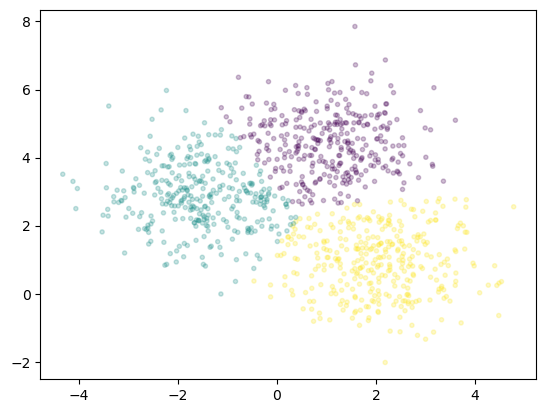

In [39]:
import dask_ml.datasets
import dask_ml.cluster
import matplotlib.pyplot as plt
X, y = dask_ml.datasets.make_blobs(n_samples=10000000,
                                   chunks=1000000,
                                   random_state=0,
                                   centers=3)
X = X.persist()
X

km = dask_ml.cluster.KMeans(n_clusters=3, init_max_iter=2, oversampling_factor=10)
km.fit(X)

fig, ax = plt.subplots()
ax.scatter(X[::10000, 0], X[::10000, 1], marker='.', c=km.labels_[::10000],
           cmap='viridis', alpha=0.25);